In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Config Comparison

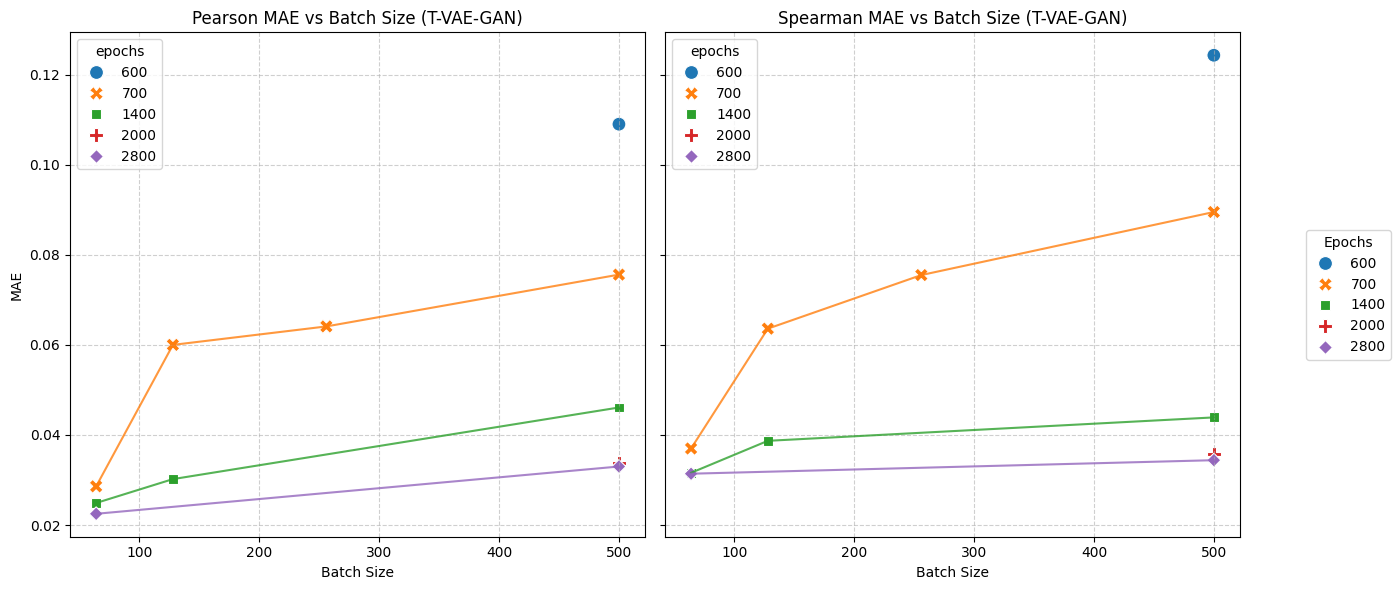

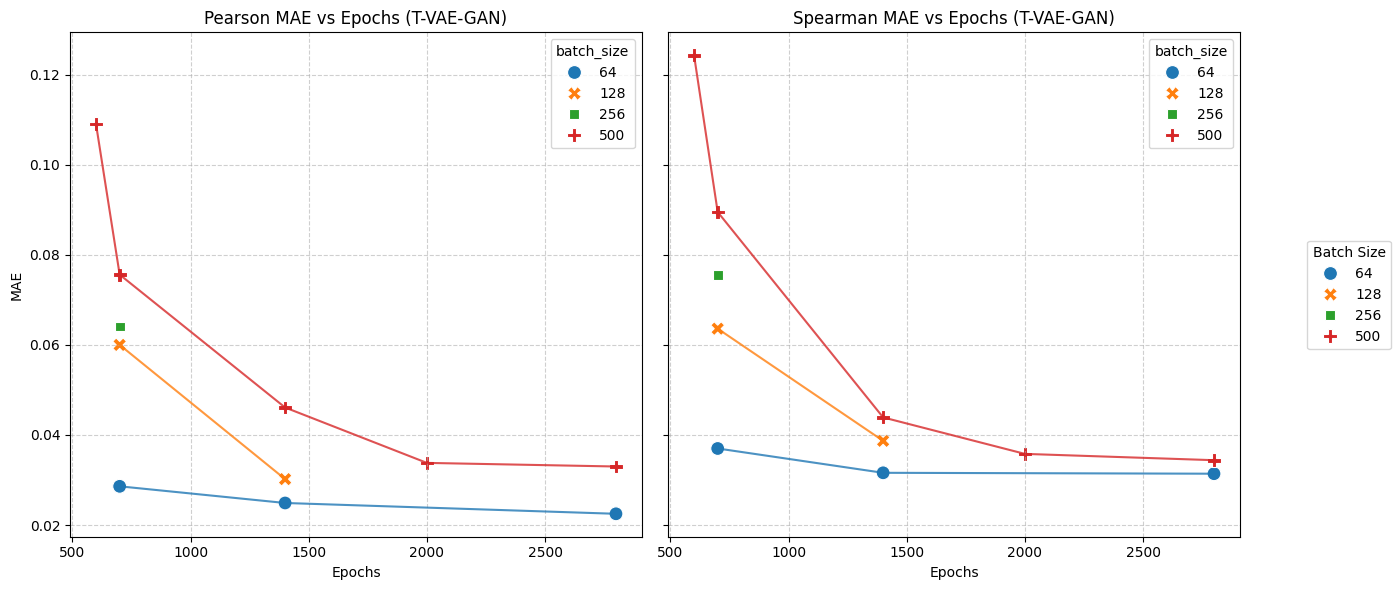

In [2]:
tvaegan_log_df = pd.read_csv("Experiment_logs/experiment_log_tvaegan-.csv")

# Keeping first run per (epochs, batch_size)
tvaegan_best = tvaegan_log_df.groupby(["epochs", "batch_size"], as_index=False).first()

# Chart 1: Batch size on x-axis, grouped by epochs
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.scatterplot(
    data=tvaegan_best,
    x="batch_size",
    y="pearson_mae",
    hue="epochs",
    style="epochs",
    s=100,
    palette="tab10",
    ax=axes[0]
)
sns.lineplot(
    data=tvaegan_best,
    x="batch_size",
    y="pearson_mae",
    hue="epochs",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Pearson MAE vs Batch Size (T-VAE-GAN)")
axes[0].set_xlabel("Batch Size")
axes[0].set_ylabel("MAE")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.scatterplot(
    data=tvaegan_best,
    x="batch_size",
    y="spearman_mae",
    hue="epochs",
    style="epochs",
    s=100,
    palette="tab10",
    ax=axes[1]
)
sns.lineplot(
    data=tvaegan_best,
    x="batch_size",
    y="spearman_mae",
    hue="epochs",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Spearman MAE vs Batch Size (T-VAE-GAN)")
axes[1].set_xlabel("Batch Size")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle="--", alpha=0.6)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Epochs", loc="center right")

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()

# Chart 2: Epochs on x-axis, grouped by batch size 
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.scatterplot(
    data=tvaegan_best,
    x="epochs",
    y="pearson_mae",
    hue="batch_size",
    style="batch_size",
    s=100,
    palette="tab10",
    ax=axes[0]
)
sns.lineplot(
    data=tvaegan_best,
    x="epochs",
    y="pearson_mae",
    hue="batch_size",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Pearson MAE vs Epochs (T-VAE-GAN)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAE")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.scatterplot(
    data=tvaegan_best,
    x="epochs",
    y="spearman_mae",
    hue="batch_size",
    style="batch_size",
    s=100,
    palette="tab10",
    ax=axes[1]
)
sns.lineplot(
    data=tvaegan_best,
    x="epochs",
    y="spearman_mae",
    hue="batch_size",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Spearman MAE vs Epochs (T-VAE-GAN)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle="--", alpha=0.6)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Batch Size", loc="center right")

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


In [3]:
real_df = pd.read_csv("Data/Real_Datasets/wine_processed_dedu.csv")
tvaegan_df = pd.read_csv('Data/Synthetic_Datasets/T-VAE-GAN/tvaegan_fake_exp20.csv')

In [4]:
print('tvaegan Dataset')
display(tvaegan_df.head())

tvaegan Dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.164844,-0.145567,0.247865,1.389269,-0.092097,0.304801,0.769210,0.853209,-1.038715,-0.172221,-0.641722,-0.864815,white
1,1.886303,0.634899,0.510778,-0.979208,0.009497,-2.480492,-2.633473,1.639565,1.091441,1.451468,-0.336552,1.489837,red
2,0.302740,-0.145353,-2.139325,-0.656036,-0.493175,-0.269248,0.705968,-1.867317,0.175019,0.192824,1.955215,1.545975,white
3,0.709200,1.071915,-1.611506,-0.532011,0.462177,-0.898633,-0.488324,0.511117,-0.831603,0.958511,-0.090360,0.776912,white
4,1.286056,-0.018523,1.568810,1.129650,0.164295,-1.287483,-0.399233,1.202462,-0.787435,0.810421,0.126805,0.180092,white


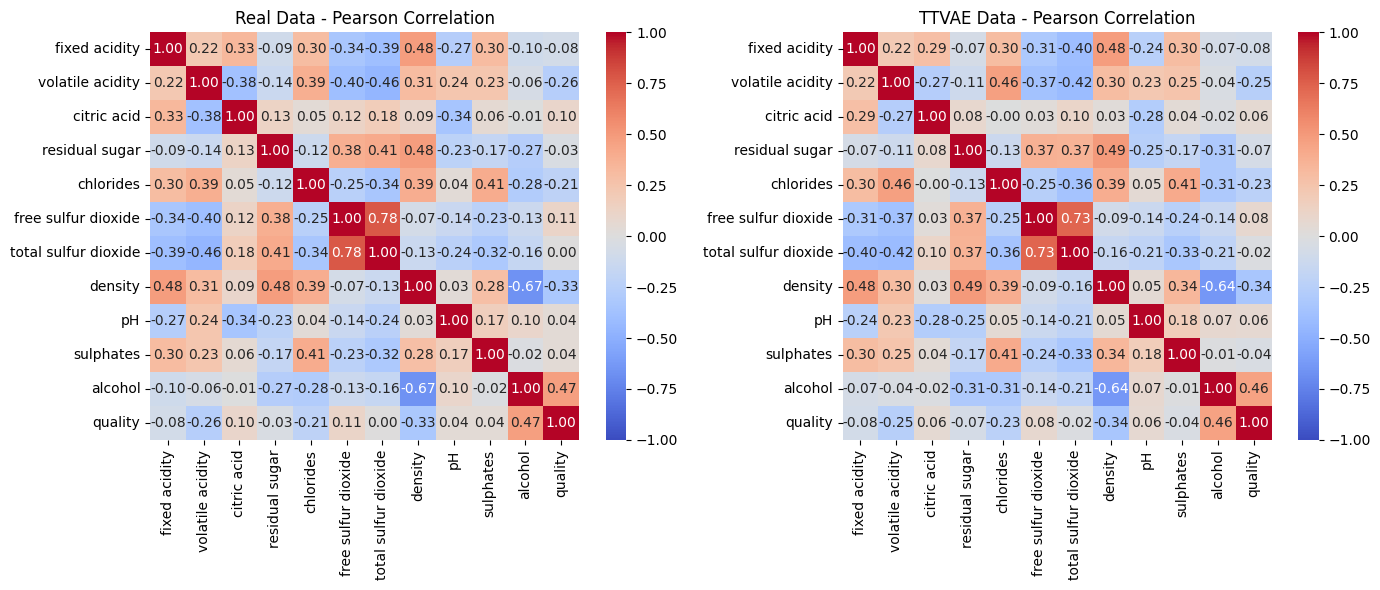

In [5]:
real_num = real_df.select_dtypes(include='number')
tvaegan_num = tvaegan_df.select_dtypes(include='number').drop(columns=['type'], errors='ignore')

real_pearson = real_num.corr(method='pearson')
tvaegan_pearson = tvaegan_num.corr(method='pearson')

plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
sns.heatmap(real_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Real Data - Pearson Correlation')

# Synthesized data
plt.subplot(1, 2, 2)
sns.heatmap(tvaegan_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('TTVAE Data - Pearson Correlation')

plt.tight_layout()
plt.show()

In [9]:
# Top 3 Pearson shifts 
abs_diff = diff_tvaegan.abs()

# Mean absolute difference (off-diagonal)
vals = abs_diff.values[np.triu_indices_from(abs_diff, k=1)]
print("Mean absolute Pearson diff (TVAE-GAN):", round(vals.mean(), 3))

# Collect correlation differences with actual values
records = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    records.append({
        "Metric": "Pearson",
        "Pair": f"{diff_tvaegan.columns[i]} – {diff_tvaegan.columns[j]}",
        "Real": real_pearson.iloc[i, j],
        "Fake": tvaegan_pearson.iloc[i, j],
        "Abs Δ": abs_diff.iloc[i, j]
    })

# Sort by largest drift (top 3)
tvaegan_pearson_top3 = sorted(records, key=lambda x: x["Abs Δ"], reverse=True)[:3]

# Pretty print standalone table 
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Pearson shifts (TVAE-GAN):\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in tvaegan_pearson_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))


Mean absolute Pearson diff (TVAE-GAN): 0.027

Top 3 biggest Pearson shifts (TVAE-GAN):

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
volatile acidity – citric acid |   -0.38 |   -0.27 |   0.11
citric acid – free sulfur dioxide |    0.12 |    0.03 |   0.09
sulphates – quality       |    0.04 |   -0.04 |   0.08
------------------------------------------------------


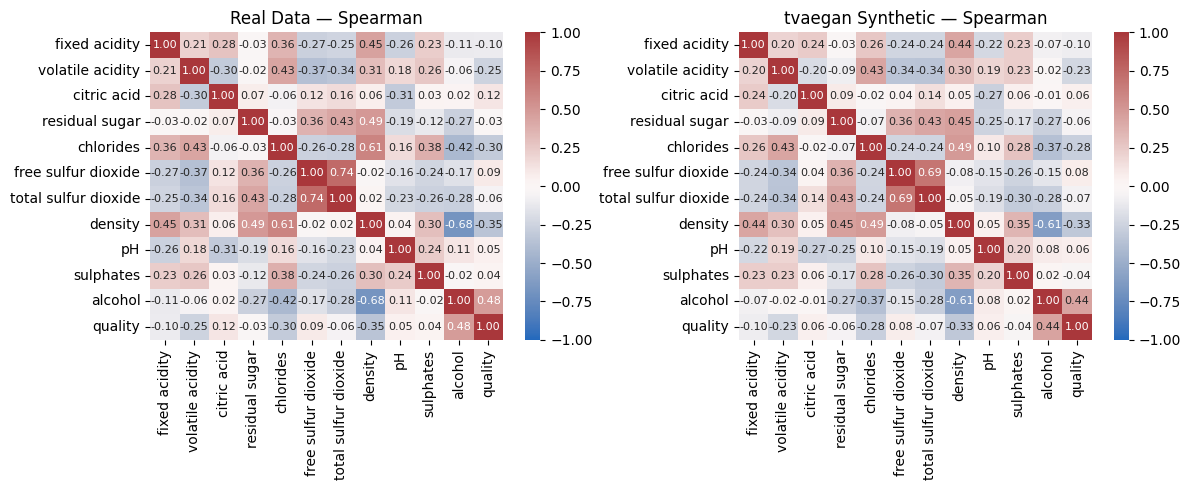

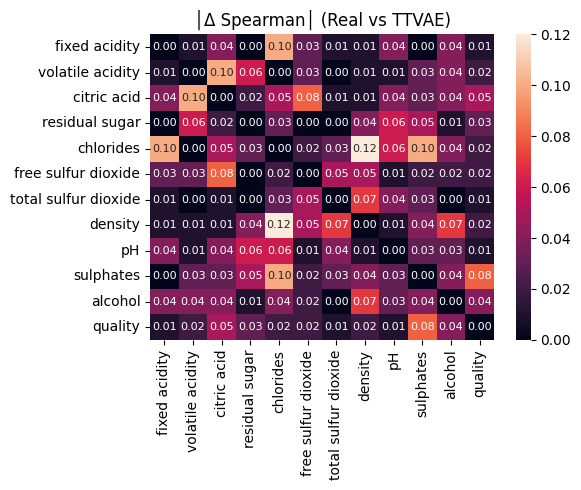

In [10]:
# Spearman correlation matrices 
real_spear = real_num.corr(method="spearman")
tvaegan_spear  = tvaegan_num.corr(method="spearman")

# Plot side by side with numbers 
fig, axes = plt.subplots(1,2,figsize=(12,5), tight_layout=True)
sns.heatmap(real_spear, vmin=-1, vmax=1, center=0, cmap="vlag",
            annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[0])
axes[0].set_title("Real Data — Spearman")

sns.heatmap(tvaegan_spear, vmin=-1, vmax=1, center=0, cmap="vlag",
            annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[1])
axes[1].set_title("tvaegan Synthetic — Spearman")

plt.show()

# Compute & plot absolute‐difference
diff_spear = (tvaegan_spear - real_spear).abs().round(2)
plt.figure(figsize=(6,5))
sns.heatmap(diff_spear, vmin=0, vmax=diff_spear.values.max(), cmap="rocket",
            annot=True, fmt=".2f", annot_kws={"size":8})
plt.title("│Δ Spearman│ (Real vs TTVAE)")
plt.tight_layout()
plt.show()


In [11]:
i,j = np.triu_indices_from(diff_spear, k=1)
print("Mean │Δ Spearman│:", diff_spear.values[i,j].mean().round(3))

Mean │Δ Spearman│: 0.034


In [12]:
# Top 3 Spearman shifts 
i, j = np.triu_indices_from(diff_spear, k=1)
records = [
    {
        "Metric": "Spearman",
        "Pair": f"{diff_spear.columns[i_]} – {diff_spear.columns[j_]}",
        "Real": real_spear.values[i_, j_],
        "Fake": tvaegan_spear.values[i_, j_],
        "Abs Δ": abs(diff_spear.values[i_, j_])
    }
    for i_, j_ in zip(i, j)
]

# Sort and take top 3
tvaegan_spearman_top3 = sorted(records, key=lambda x: x["Abs Δ"], reverse=True)[:3]

#  Pretty print standalone table 
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Spearman shifts (TVAE-GAN):\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in tvaegan_spearman_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))



Top 3 biggest Spearman shifts (TVAE-GAN):

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
chlorides – density       |    0.61 |    0.49 |   0.12
fixed acidity – chlorides |    0.36 |    0.26 |   0.10
volatile acidity – citric acid |   -0.30 |   -0.20 |   0.10
------------------------------------------------------


Distance correlation

In [14]:
import numpy as np

# 1- fast distance covariance
def fast_dcov(x, y):
    x = np.asarray(x).flatten()
    y = np.asarray(y).flatten()
    n = len(x)
    
    # Sort x
    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]
    
    # Row sums of distance matrix of x
    si = np.cumsum(x)
    s = si[-1]
    ax = (-(n-2) + 2*np.arange(n)) * x + (s - 2*si)
    
    # Weight matrix
    v = np.column_stack((x, y, x*y))
    nw = v.shape[1]
    
    idx_buf = np.zeros((n, 2), dtype=int)
    idx_buf[:, 0] = np.arange(n)
    
    iv1 = np.zeros(n)
    iv2 = np.zeros(n)
    iv3 = np.zeros(n)
    iv4 = np.zeros(n)
    
    i = 1
    r, s_idx = 0, 1
    while i < n:
        gap = 2 * i
        k = 0
        idxr = idx_buf[:, r]
        csumv = np.vstack([np.zeros((1, nw)), np.cumsum(v[idxr], axis=0)])
        
        for j in range(0, n, gap):
            st1 = j
            e1 = min(st1 + i - 1, n-1)
            st2 = j + i
            e2 = min(st2 + i - 1, n-1)
            
            while st1 <= e1 and st2 <= e2:
                idx1 = idxr[st1]
                idx2 = idxr[st2]
                if y[idx1] >= y[idx2]:
                    idx_buf[k, s_idx] = idx1
                    st1 += 1
                else:
                    idx_buf[k, s_idx] = idx2
                    iv1[idx2] += e1 - st1 + 1
                    iv2[idx2] += csumv[e1+1, 0] - csumv[st1, 0]
                    iv3[idx2] += csumv[e1+1, 1] - csumv[st1, 1]
                    iv4[idx2] += csumv[e1+1, 2] - csumv[st1, 2]
                    st2 += 1
                k += 1
            
            # Copy leftovers
            if st1 <= e1:
                idx_buf[k:k+e1-st1+1, s_idx] = idxr[st1:e1+1]
                k += e1-st1+1
            elif st2 <= e2:
                idx_buf[k:k+e2-st2+1, s_idx] = idxr[st2:e2+1]
                k += e2-st2+1
                
        i = gap
        r, s_idx = s_idx, r
    
    covterm = n * np.sum((x - np.mean(x)) * (y - np.mean(y)))
    c1 = np.dot(iv1, v[:, 2])
    c2 = np.sum(iv4)
    c3 = np.dot(iv2, y)
    c4 = np.dot(iv3, x)
    d = 4 * ((c1 + c2) - (c3 + c4)) - 2 * covterm
    
    ySorted = y[idx_buf[n-1::-1, r]]
    si_y = np.cumsum(ySorted)
    s_y = si_y[-1]
    by = np.zeros(n)
    by[idx_buf[n-1::-1, r]] = (-(n-2) + 2*np.arange(n)) * ySorted + (s_y - 2*si_y)
    
    nsq = n * n
    ncb = nsq * n
    nq = ncb * n
    term1 = d / nsq
    term2 = 2 * np.dot(ax, by) / ncb
    term3 = np.sum(ax) * np.sum(by) / nq
    
    covsq = (term1 + term3) - term2
    return covsq

#2 - distance correlation matrix for tabular data
def distance_correlation_matrix(data):
    data = np.asarray(data)
    n_features = data.shape[1]
    dcor_mat = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(i, n_features):
            x = data[:, i]
            y = data[:, j]
            dcov_xy = fast_dcov(x, y)
            dcov_xx = fast_dcov(x, x)
            dcov_yy = fast_dcov(y, y)
            dcor = np.sqrt(dcov_xy / np.sqrt(dcov_xx * dcov_yy)) if dcov_xx > 0 and dcov_yy > 0 else 0
            dcor_mat[i, j] = dcor
            dcor_mat[j, i] = dcor

    return dcor_mat


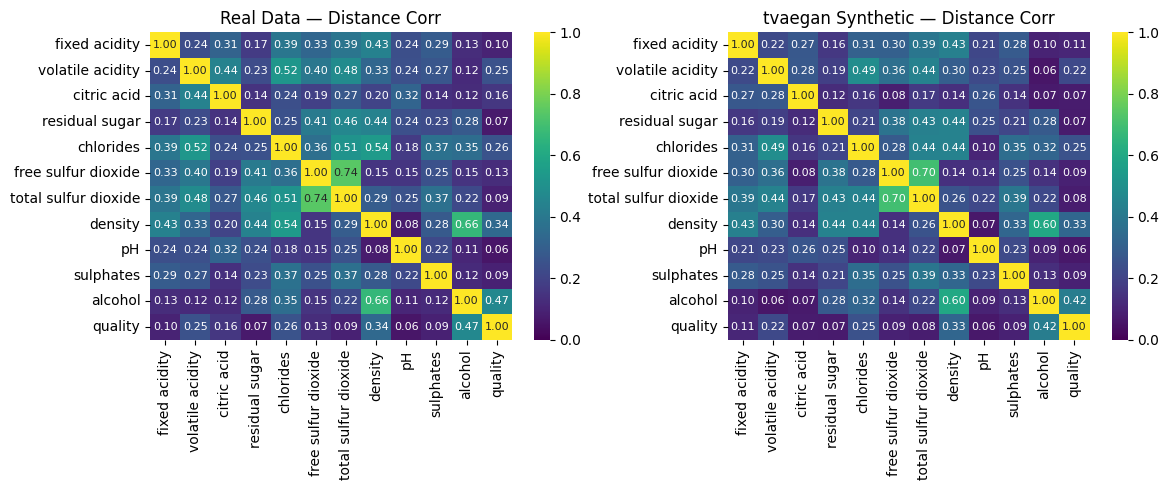

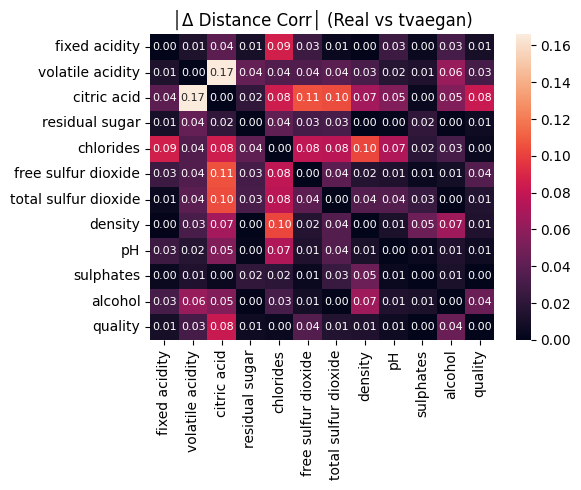

In [15]:
# Compute distance correlation matrices for real and fake 
real_dcor = distance_correlation_matrix(real_num.values)
fake_dcor = distance_correlation_matrix(tvaegan_num.values)

real_dcor = pd.DataFrame(real_dcor, index=real_num.columns, columns=real_num.columns)
fake_dcor = pd.DataFrame(fake_dcor, index=tvaegan_num.columns, columns=tvaegan_num.columns)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5), tight_layout=True)
sns.heatmap(real_dcor, vmin=0, vmax=1, cmap="viridis", annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[0])
axes[0].set_title("Real Data — Distance Corr")

sns.heatmap(fake_dcor, vmin=0, vmax=1, cmap="viridis", annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[1])
axes[1].set_title("tvaegan Synthetic — Distance Corr")

plt.show()

# Difference heatmap 
diff_dcor = (real_dcor - fake_dcor).abs().round(3)
plt.figure(figsize=(6,5))
sns.heatmap(diff_dcor, vmin=0, vmax=diff_dcor.values.max(), cmap="rocket",
            annot=True, fmt=".2f", annot_kws={"size":8})
plt.title("│Δ Distance Corr│ (Real vs tvaegan)")
plt.tight_layout()
plt.show()



In [16]:
#  Top 3 Distance Corr shifts 
i, j = np.triu_indices_from(diff_dcor, k=1)
records = [
    {
        "Metric": "Distance Corr",
        "Pair": f"{diff_dcor.columns[i_]} – {diff_dcor.columns[j_]}",
        "Real": real_dcor.values[i_, j_],
        "Fake": fake_dcor.values[i_, j_],
        "Abs Δ": abs(diff_dcor.values[i_, j_])
    }
    for i_, j_ in zip(i, j)
]

# Sort and take top 3
tvaegan_dcor_top3 = sorted(records, key=lambda x: x["Abs Δ"], reverse=True)[:3]

# Pretty print standalone table 
col_width = 30
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Distance Corr shifts (TVAE-GAN):\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in tvaegan_dcor_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))



Top 3 biggest Distance Corr shifts (TVAE-GAN):

-----------------------------------------------------------
Pair                           |    Real |    Fake |  Abs Δ
-----------------------------------------------------------
volatile acidity – citric acid |    0.44 |    0.28 |   0.17
citric acid – free sulfur dioxide |    0.19 |    0.08 |   0.11
citric acid – total sulfur dioxide |    0.27 |    0.17 |   0.10
-----------------------------------------------------------


In [18]:
# MAE for distance correlation 
vals = diff_dcor.values[np.triu_indices_from(diff_dcor, k=1)]
mae_dcor = vals.mean()
print("Mean absolute Distance Corr diff (MAE):", round(mae_dcor, 3))


Mean absolute Distance Corr diff (MAE): 0.034


In [19]:
from tabulate import tabulate
import pandas as pd

def pretty_print_tool_table(tool_name, top3_dict):
    rows = []
    for metric, records in top3_dict.items():
        df = pd.DataFrame(records)[["Pair", "Real", "Fake", "Abs Δ"]]

        for idx, row in df.iterrows():
            rows.append([
                tool_name if idx == 0 and metric == list(top3_dict.keys())[0] else "",
                metric if idx == 0 else "",
                row["Pair"],
                f"{row['Real']:.3f}",
                f"{row['Fake']:.3f}",
                f"{row['Abs Δ']:.3f}"
            ])
        # Add dashed separator row (short, like before)
        rows.append(["", "-----", "-----", "-----", "-----", "-----"])

    headers = ["Tool", "Metric", "Pair", "Real", "Fake", "Abs Δ"]
    print(tabulate(rows, headers=headers, tablefmt="pretty"))

# Combine all three for TVAE-GAN 
tvaegan_top3_dict = {
    "Pearson": tvaegan_pearson_top3,
    "Spearman": tvaegan_spearman_top3,
    "Distance Corr": tvaegan_dcor_top3
}

# Print grouped table for TVAE-GAN
pretty_print_tool_table("TVAE-GAN", tvaegan_top3_dict)


+----------+---------------+------------------------------------+--------+--------+-------+
|   Tool   |    Metric     |                Pair                |  Real  |  Fake  | Abs Δ |
+----------+---------------+------------------------------------+--------+--------+-------+
| TVAE-GAN |    Pearson    |   volatile acidity – citric acid   | -0.377 | -0.272 | 0.105 |
|          |               | citric acid – free sulfur dioxide  | 0.119  | 0.026  | 0.093 |
|          |               |        sulphates – quality         | 0.042  | -0.036 | 0.078 |
|          |     -----     |               -----                | -----  | -----  | ----- |
|          |   Spearman    |        chlorides – density         | 0.609  | 0.490  | 0.120 |
|          |               |     fixed acidity – chlorides      | 0.359  | 0.258  | 0.100 |
|          |               |   volatile acidity – citric acid   | -0.304 | -0.201 | 0.100 |
|          |     -----     |               -----                | -----  | -----

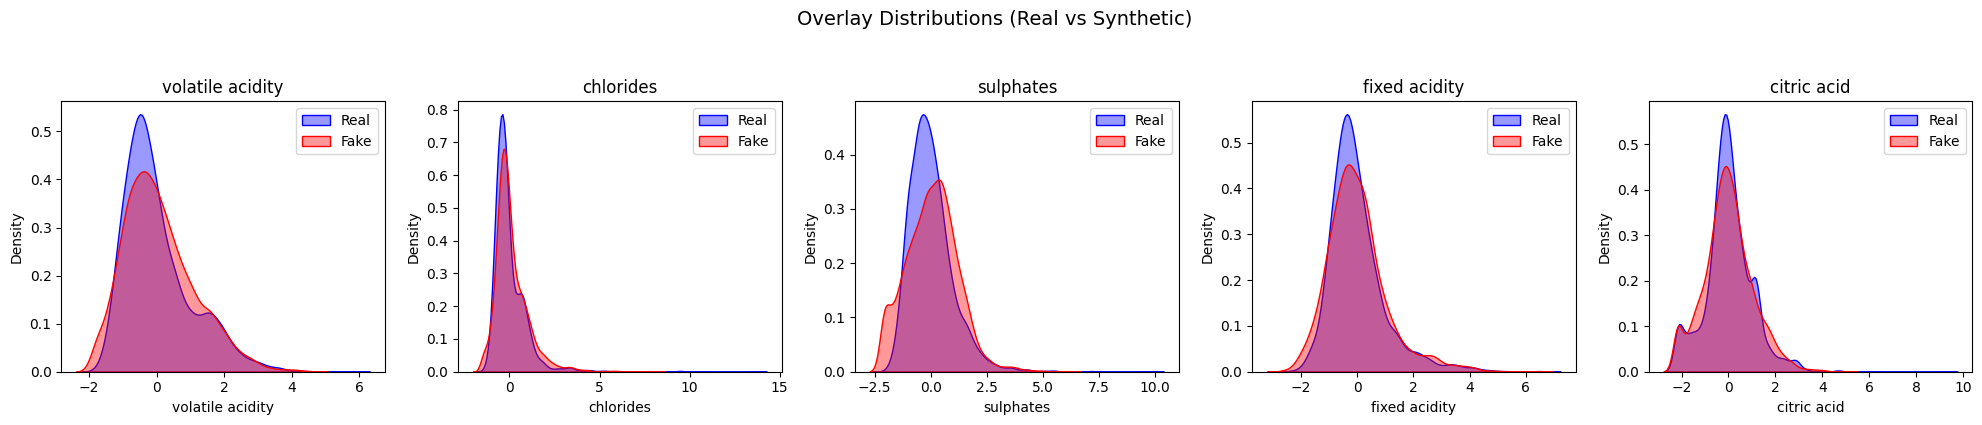

In [20]:
features = ["volatile acidity", "chlorides", "sulphates", "fixed acidity", "citric acid"]

fig, axes = plt.subplots(1, len(features), figsize=(4*len(features), 4), tight_layout=True)

for idx, feat in enumerate(features):
    sns.kdeplot(real_num[feat], fill=True, color="blue", label="Real", ax=axes[idx], alpha=0.4)
    sns.kdeplot(tvaegan_num[feat], fill=True, color="red", label="Fake", ax=axes[idx], alpha=0.4)
    axes[idx].set_title(feat)
    axes[idx].legend()

plt.suptitle("Overlay Distributions (Real vs Synthetic)", fontsize=14, y=1.05)
plt.show()


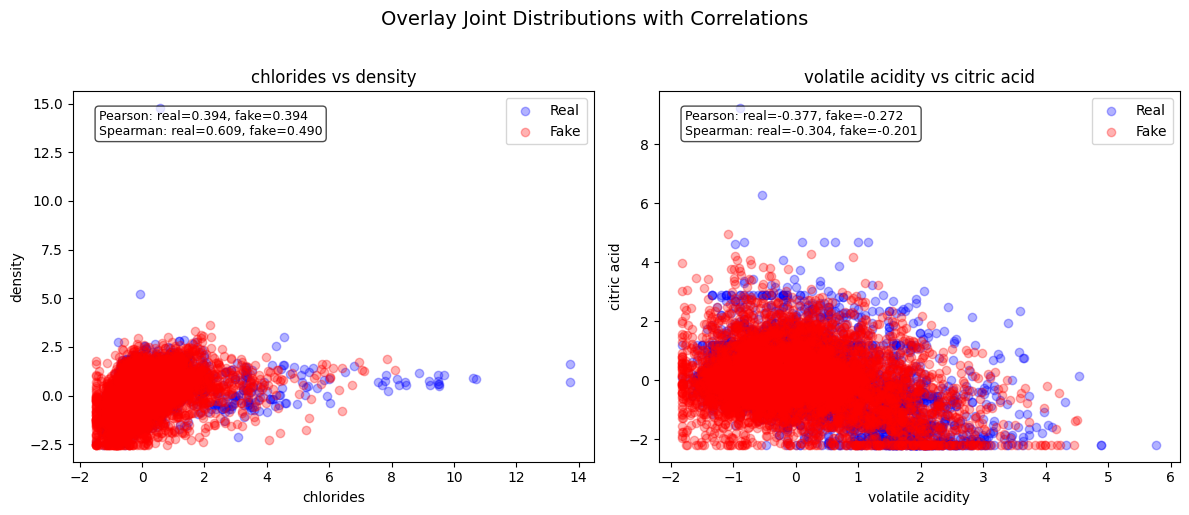

In [21]:
from scipy.stats import spearmanr

pairs = [
    ("chlorides", "density"),
    ("volatile acidity", "citric acid")
    
]

fig, axes = plt.subplots(1, len(pairs), figsize=(6*len(pairs), 5), tight_layout=True)

for idx, (f1, f2) in enumerate(pairs):
    # --- Scatter overlay ---
    axes[idx].scatter(real_num[f1], real_num[f2], alpha=0.3, color="blue", label="Real")
    axes[idx].scatter(tvaegan_num[f1], tvaegan_num[f2], alpha=0.3, color="red", label="Fake")

    axes[idx].set_title(f"{f1} vs {f2}")
    axes[idx].set_xlabel(f1)
    axes[idx].set_ylabel(f2)

    # --- Compute correlations ---
    pear_real = real_num[[f1, f2]].corr(method="pearson").iloc[0,1]
    pear_fake = tvaegan_num[[f1, f2]].corr(method="pearson").iloc[0,1]
    spear_real, _ = spearmanr(real_num[f1], real_num[f2])
    spear_fake, _ = spearmanr(tvaegan_num[f1], tvaegan_num[f2])

    # --- Annotate on plot ---
    textstr = (f"Pearson: real={pear_real:.3f}, fake={pear_fake:.3f}\n"
               f"Spearman: real={spear_real:.3f}, fake={spear_fake:.3f}")
    axes[idx].text(0.05, 0.95, textstr, transform=axes[idx].transAxes,
                   fontsize=9, va="top", ha="left",
                   bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

    axes[idx].legend()

plt.suptitle("Overlay Joint Distributions with Correlations", fontsize=14, y=1.02)
plt.show()
